# Relax Data Science Challenge 

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.style as style
style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(8,4)})

In [2]:
#load data
user_engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

## Data Definition part 1
users dataframe

In [3]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
#check users dtypes
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [5]:
#look at NaNs as % of total
users.isna().sum()/len(users)*100

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64

In [6]:
#check number of unique values 
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [7]:
#check unique values as percent of total
for col in users.columns:
    print(col)
    print(users[col].value_counts()/len(users[col])*100)
   

object_id
2047     0.008333
7473     0.008333
9534     0.008333
3387     0.008333
1338     0.008333
           ...   
10904    0.008333
4759     0.008333
6806     0.008333
661      0.008333
2049     0.008333
Name: object_id, Length: 12000, dtype: float64
creation_time
2014-02-11 17:57:53    0.016667
2013-05-25 04:35:52    0.016667
2012-09-01 07:22:09    0.016667
2012-09-14 21:35:03    0.016667
2013-11-30 22:18:22    0.008333
                         ...   
2012-11-20 12:37:52    0.008333
2014-04-11 13:28:39    0.008333
2014-05-22 05:10:37    0.008333
2013-08-19 09:56:57    0.008333
2012-10-18 11:28:56    0.008333
Name: creation_time, Length: 11996, dtype: float64
name
Cavalcanti Victor     0.041667
Araujo Gabriela       0.041667
Souza Fernanda        0.033333
Carvalho Bruna        0.033333
Costa Alice           0.033333
                        ...   
Fink Lisa             0.008333
Jacobsen Alexander    0.008333
Long Emery            0.008333
Fiedler Jessika       0.008333
Eames Grace  

In [8]:
#check for duplicate rows
users.duplicated().sum()

0

In [9]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


## Data Definition part 2
user_engagement dataframe

In [10]:
#look at 2nd dataframe
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [11]:
#check data types
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [12]:
#check NaNs as % of total
user_engagement.isna().sum()/len(user_engagement)*100

time_stamp    0.0
user_id       0.0
visited       0.0
dtype: float64

In [13]:
#check number of unique values
user_engagement.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [14]:
#check unique values as percent of total
user_engagement.time_stamp.value_counts()/len(user_engagement.time_stamp)*100

2014-05-13 03:09:54    0.000962
2014-02-23 03:09:54    0.000962
2014-03-01 17:13:38    0.000962
2014-04-25 17:13:38    0.000962
2014-05-19 13:40:27    0.000962
                         ...   
2013-11-03 10:32:34    0.000481
2014-01-31 02:09:35    0.000481
2013-11-25 02:18:14    0.000481
2014-02-23 17:41:51    0.000481
2013-03-01 15:36:59    0.000481
Name: time_stamp, Length: 207220, dtype: float64

In [15]:
#check unique values as percent of total
user_engagement.user_id.value_counts()/len(user_engagement.user_id)*100

3623     0.291462
906      0.288577
1811     0.285210
7590     0.283767
8068     0.281362
           ...   
6763     0.000481
3773     0.000481
5822     0.000481
10040    0.000481
2047     0.000481
Name: user_id, Length: 8823, dtype: float64

In [16]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


## Data Wrangling/Cleaning 

In [17]:
#change time_stamp to datetime object
user_engagement.time_stamp = pd.to_datetime(user_engagement.time_stamp)
users.creation_time = pd.to_datetime(users.creation_time)
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [18]:
#deal with NaNs
#last_session_creation_time had 26.475% - maybe never logged in again?
#set NaNs to 0
users.last_session_creation_time = users.last_session_creation_time.fillna(0)

In [19]:
#invited_by_user_id has 46.525% NaNs - creation_source - maybe not invited by another user?
users[users.invited_by_user_id.isna()].groupby('creation_source').mean()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
creation_source,,,,,,
PERSONAL_PROJECTS,5975.326859,4.992114e+08,0.242539,0.143534,144.294173,NaN
SIGNUP,6020.826545,1.254162e+09,0.251557,0.152851,146.248203,NaN
SIGNUP_GOOGLE_AUTH,6145.203610,1.379242e+09,0.244043,0.149458,141.523466,NaN


In [20]:
#fill these NaNs with 0
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.isna().sum()/len(users)*100

object_id                     0.0
creation_time                 0.0
name                          0.0
email                         0.0
creation_source               0.0
last_session_creation_time    0.0
opted_in_to_mailing_list      0.0
enabled_for_marketing_drip    0.0
org_id                        0.0
invited_by_user_id            0.0
dtype: float64

## Preprocessing
Create  'adopted_user' variable - Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  

In [21]:
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [22]:
#use floor for floor by days 
#need numeric, so datetimes are converted to unix times
user_engagement['time_stamp'] = user_engagement['time_stamp'].dt.floor('d').astype(np.int64)

In [23]:
#sorting and remove duplicated days per users 
user_engagement = user_engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()
user_engagement

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1
...,...,...,...
207912,1378425600000000000,11996,1
207913,1358208000000000000,11997,1
207914,1398556800000000000,11998,1
207915,1338595200000000000,11999,1


In [24]:
#groupby with rolling by each 3 rows 
a = user_engagement.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [25]:
c = b[b == 7].index.get_level_values('user_id').tolist()
print (c)

[2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 33, 33, 33, 42, 42, 42, 42, 42, 42, 50, 50, 60, 63, 63, 63, 63, 63, 63, 63, 69, 69, 69, 69, 69, 69, 74, 74, 74, 74, 74, 74, 81, 81, 82, 82, 82, 82, 82, 82, 87, 87, 87, 87, 87, 87, 87, 87, 133, 133, 135, 135, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 153, 153, 153, 153, 153, 153, 160, 160, 160, 160, 160, 160, 160, 160, 165, 168, 168, 168, 168, 168, 168, 168, 168, 185, 185, 185, 188, 188, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 200, 200, 200, 200, 202, 202, 203, 203, 203, 209, 209, 209, 209, 209, 209, 214, 214, 214, 214, 214, 230, 230, 230, 230, 245, 245, 247, 247, 247, 247, 247, 247, 247, 263, 263, 263, 265, 275, 275, 280, 280, 297, 298, 298, 298, 298, 298, 305, 310, 310, 310, 311, 311, 311, 311, 311, 322, 322, 322, 322, 322, 322, 322, 322, 322, 341, 341, 341, 341, 341, 341, 345, 351, 351, 362, 363, 363, 363, 363, 363, 363, 363, 370, 401, 401, 401, 418, 418, 418, 430, 430, 430, 430, 430, 

In [26]:
a_users = pd.DataFrame(c, columns=['object_id'])
a_users['count'] = 1
a_users

,object_id,count
0,2,1
1,10,1
2,10,1
3,10,1
4,10,1
...,...,...
6672,11975,1
6673,11975,1
6674,11975,1
6675,11975,1


In [27]:
a_users = a_users.groupby('object_id').sum().reset_index()
a_users['adopted_user'] = 1

In [28]:
a_users.head()

,object_id,count,adopted_user
0,2,1,1
1,10,12,1
2,33,3,1
3,42,6,1
4,50,2,1


In [29]:
#merge user_engagement df with active_user row 
df = pd.merge(users, a_users.drop('count', axis=1), how='outer', on='object_id')
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,NaN


In [30]:
#check if merge was successful, if there were any users not in both sets
#seems that only ~21% of users are retained
df.isna().sum()/len(df)*100

object_id                      0.000000
creation_time                  0.000000
name                           0.000000
email                          0.000000
creation_source                0.000000
last_session_creation_time     0.000000
opted_in_to_mailing_list       0.000000
enabled_for_marketing_drip     0.000000
org_id                         0.000000
invited_by_user_id             0.000000
adopted_user                  88.683333
dtype: float64

In [31]:
#fill adopted_user NaNs with 0
df.adopted_user = df.adopted_user.fillna(0)
df.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
dtype: int64

## Exploratory Data Analysis 

In [32]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.014115e+09,0.249500,0.149333,141.884583,3188.691333,0.113167
std,3464.24595,6.087938e+08,0.432742,0.356432,124.056723,3869.027693,0.316810
min,1.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000e+00,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,1.368880e+09,0.000000,0.000000,108.000000,875.000000,0.000000
75%,9000.25000,1.393729e+09,0.000000,0.000000,238.250000,6317.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


In [33]:
profile = ProfileReport(df)
profile

## Modeling
identify  which  factors  predict  future  user adoption

In [34]:
#convert creation_time from datetime to unix timestamp
df.creation_time = df.creation_time.astype(np.int64)

In [35]:
df.dtypes

object_id                       int64
creation_time                   int64
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                  float64
dtype: object

In [36]:
#create dummy features for categorical objects
#drop 'name' and 'email' beforehand
df_dummy = pd.get_dummies(df.drop(['name', 'email'], axis=1))
df_dummy

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1398138810000000000,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,1384487104000000000,1.396238e+09,0,0,1,316.0,1.0,0,1,0,0,0
2,3,1363734892000000000,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
3,4,1369123768000000000,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
4,5,1358417660000000000,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,1378448055000000000,1.378448e+09,0,0,89,8263.0,0.0,0,1,0,0,0
11996,11997,1357842517000000000,1.358275e+09,0,0,200,0.0,0.0,0,0,0,0,1
11997,11998,1398602716000000000,1.398603e+09,1,1,83,8074.0,0.0,1,0,0,0,0
11998,11999,1338465359000000000,1.338638e+09,0,0,6,0.0,0.0,0,0,1,0,0


In [37]:
#define variabel X, y
X = df_dummy.drop('adopted_user', axis=1)
y = df_dummy.adopted_user

In [38]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Create a k-NN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# Predict the labels for the training data X
y_pred = knn.predict(X_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8696666666666667


In [42]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2602   51]
 [ 340    7]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2653
         1.0       0.12      0.02      0.03       347

    accuracy                           0.87      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.80      0.87      0.83      3000



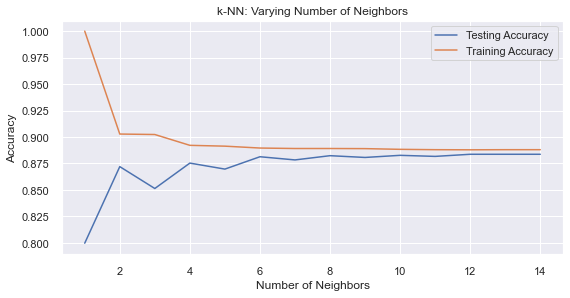

In [43]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### Regenerate model for K=6 

In [44]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8813333333333333


In [46]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2643   10]
 [ 346    1]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2653
         1.0       0.09      0.00      0.01       347

    accuracy                           0.88      3000
   macro avg       0.49      0.50      0.47      3000
weighted avg       0.79      0.88      0.83      3000



### Logistic Regressor Model

In [47]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2653    0]
 [ 347    0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2653
         1.0       0.00      0.00      0.00       347

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.78      0.88      0.83      3000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


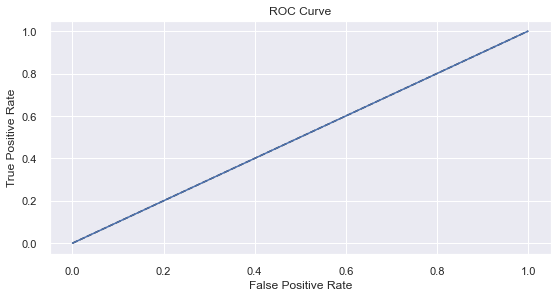

In [48]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.5
AUC scores computed using 5-fold cross-validation: [0.5 0.5 0.5 0.5 0.5]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

### Decision Tree Classifier 

In [50]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4}
Best score is 0.9635833333333332


In [51]:
# Predict the labels of the test set: y_pred
y_pred = tree_cv.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2620   33]
 [ 124  223]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2653
         1.0       0.87      0.64      0.74       347

    accuracy                           0.95      3000
   macro avg       0.91      0.82      0.86      3000
weighted avg       0.95      0.95      0.94      3000



## Feature Importance 

Feature: 0, Score: 0.01983
Feature: 1, Score: 0.34993
Feature: 2, Score: 0.55723
Feature: 3, Score: 0.00188
Feature: 4, Score: 0.00224
Feature: 5, Score: 0.03499
Feature: 6, Score: 0.01464
Feature: 7, Score: 0.00386
Feature: 8, Score: 0.00449
Feature: 9, Score: 0.00397
Feature: 10, Score: 0.00468
Feature: 11, Score: 0.00226


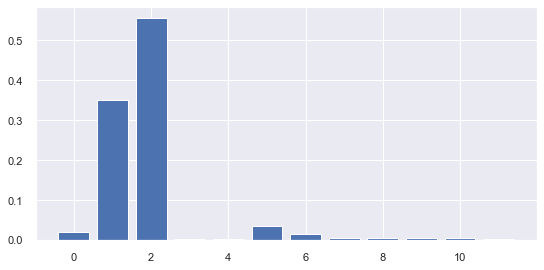

In [52]:
# fit the model
tree.fit(X_train, y_train)

# get importance
importance = tree.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
X_train.columns

Index(['object_id', 'creation_time', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

**This suggests the most important features in predicing adopted_user are 'last_session_creation_time' (55%) and creation time (35%)**

<AxesSubplot:xlabel='adopted_user', ylabel='last_session_creation_time'>

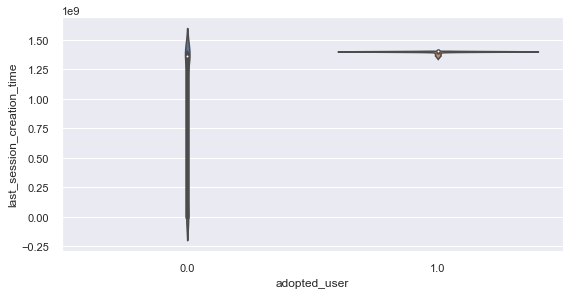

In [54]:
#look at adopted_user vs. last session creation time
sns.violinplot(x='adopted_user', y='last_session_creation_time', data=df)

<AxesSubplot:xlabel='adopted_user', ylabel='creation_time'>

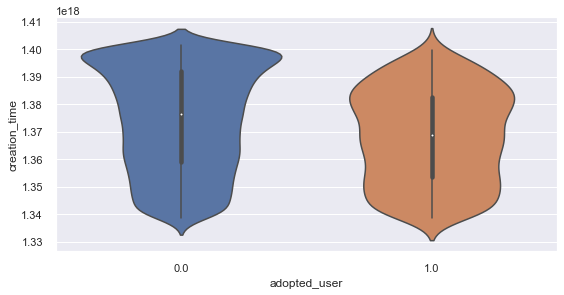

In [55]:
#look at adopted_user vs. creation time
sns.violinplot(x='adopted_user', y='creation_time', data=df)

In [56]:
#convert 2 unix variables to dateime objects
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df.creation_time = pd.to_datetime(df.creation_time)

<AxesSubplot:xlabel='creation_time', ylabel='last_session_creation_time'>

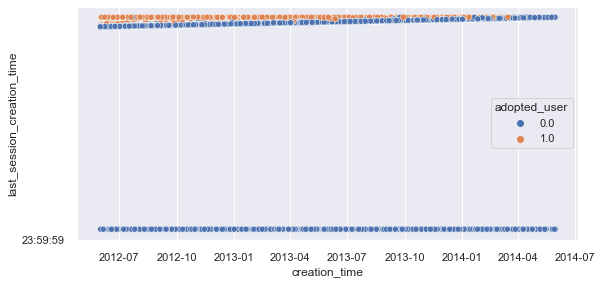

In [57]:
#look at adopted_user vs. creation time/last_session_creation_time
sns.scatterplot(y='last_session_creation_time', x='creation_time', hue='adopted_user', data=df)

## Findings

**Please note any factors you considered or investigation you did, even if they did not pan out.**

- After cleaning and wrangling the data I created the 'adopted_user' variable 
- I'm not 100% confident about the code I used to get users who has logged into the product on three separate days in at least one seven­day period ('adopted_user')
<https://stackoverflow.com/questions/49346045/pandas-user-who-has-logged-into-the-product-on-three-separate-days-in-at-least>
- It seems that currently Relax Inc. has around 21% of users are retained
- During modeling I converted the datetime objects to unix timestamps, not confident this was the best thing to do
- also dropped name/email before making dummy variables

- It seemed that KNN and Logistic Regressor Classifiers were not predicting positive adopted_users very well at all
- Using a Decision Tree Classifier yielded much better results
- Feature importance didn't seem to yield much helpful info as the **two most important features in predicing adopted_user were 'last_session_creation_time' (55%) and creation time (35%)**
    - It was hard for me to parse out the unix timestamps to make further sense of the relationship between these features and adopted_users
    - other then that it is important for users to be logging on recently


**Feel free to identify any further research or data you think would be valuable.**
    - some names/emails may have duplicates... not true duplicates, so you may have a few accounts logins with same email or name?
    - dig in deeper into feature importance and come up with actionable steps for Relax Inc. to boost these numbers
    - could use the feature I created (counts of 3 consecutive logins within a 7 day window), this may be a strong predictor of an adopted_user and could be used to develop a program to encourage this behavior)